Fundamentals of Data Analysis Project

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [20]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


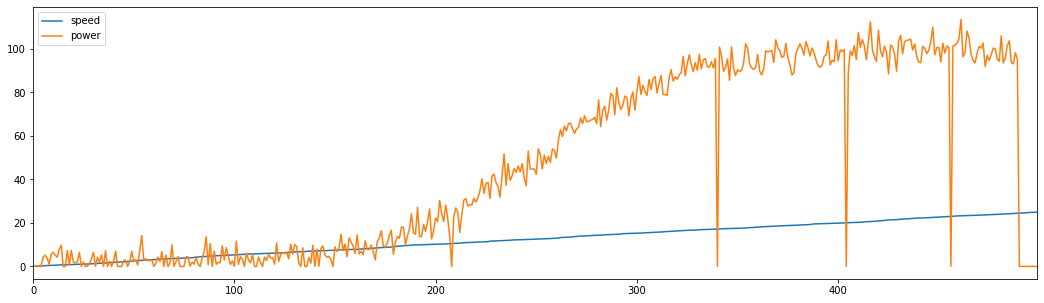

In [21]:
df.plot(figsize=(18,5))

In [22]:
df.isnull().values.any()

False

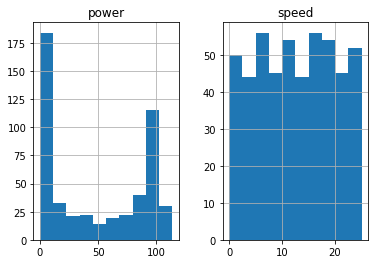

In [23]:
df.hist();

In [25]:
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


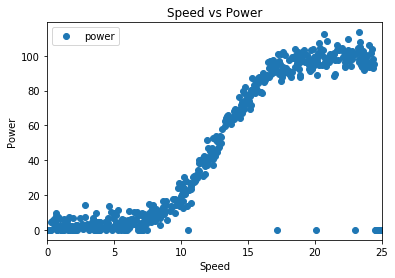

In [27]:
df.plot(x='speed', y='power', style='o')
plt.title('Speed vs Power')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show();

In [28]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print(regressor.intercept_)

-13.603433993820211


In [32]:
print(regressor.coef_)

[4.89542079]


In [33]:
y_pred = regressor.predict(X_test)

In [34]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
0,7.060,10.408605
1,51.149,48.632051
2,71.763,57.326318
3,99.357,96.161691
4,113.556,100.327694
...,...,...
95,96.058,77.911562
96,3.578,1.097515
97,93.931,95.304992
98,0.000,1.709442


In [35]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 15.371033053882327
Mean Squared Error: 496.3930965626669
Root Mean Squared Error: 22.279880981788637


In [6]:
X = df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 

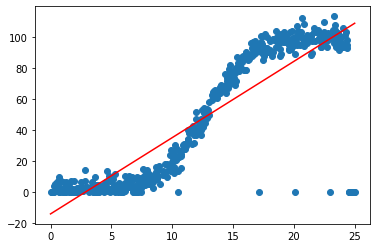

In [7]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()